<h1>Iris Flower Classification using Neural Networks</h1>
<p>We will build a 3-layer neural network form scratch</p>

<h3>Importing packages</h3>
<p>We require the following packages to build our neural network :</p>
<ul>
    <li>NumPy, for vectorized calculations</li>
    <li>Matplotlib, for data visualization</li>
    <li>Pandas, for reading and manipulating the dataset</li>
    <li>Scipy.optimize's fmin_tnc() function, for advanced optimization</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc

<h3>Fetching the dataset</h3>
<p>We use Pandas' read_csv() function to fetch data from the Iris.csv dataset file</p>

In [2]:
dataset = pd.read_csv('Iris.csv').drop(['Id'], axis=1)
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<h3>Feature Extraction</h3>
<p>For our neural network, we require the following features :</p>
<ul>
    <li>SepalLengthCm - The sepal length of the flower (in cm)</li>
    <li>SepalWidthCm - The sepal width of the flower (in cm)</li>
    <li>PetalLengthCm - The petal length of the flower (in cm)</li>
    <li>PetalWidthCm - The petal width of the flower (in cm)</li>
</ul>
<p>Now, the 'Species' column is required to be modified to numerical figures for the neural network learning phase</p>

In [3]:
dataset.loc[dataset['Species'] == 'Iris-setosa', 'Species'] = 0
dataset.loc[dataset['Species'] == 'Iris-virginica', 'Species'] = 1
dataset.loc[dataset['Species'] == 'Iris-versicolor', 'Species'] = 2

labels = dataset['Species'].values
features = dataset.drop(['Species'], axis=1).values
labels = pd.get_dummies(labels).values

print(features.shape)
print(labels.shape)

(150, 4)
(150, 3)


<h3>Visualizing the dataset</h3>
<p>We make a scatter plot between sepal length and sepal width of the Iris flowers, as well as a scatter plot between petal length and petal width of the Iris flowers.</p>

In [4]:
sepal_iris_setosa = dataset[dataset['Species'] == 0].drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
petal_iris_setosa = dataset[dataset['Species'] == 0].drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

sepal_iris_virginica = dataset[dataset['Species'] == 1].drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
petal_iris_virginica = dataset[dataset['Species'] == 1].drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

sepal_iris_versicolor = dataset[dataset['Species'] == 2].drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
petal_iris_versicolor = dataset[dataset['Species'] == 2].drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

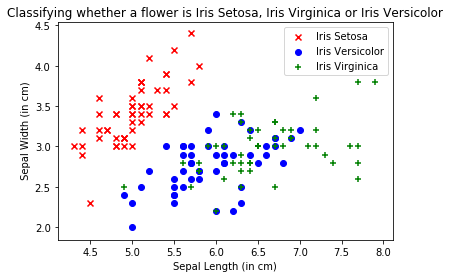

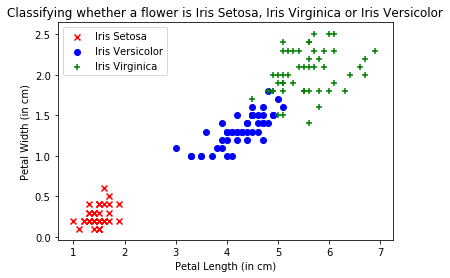

In [5]:
plt.scatter(sepal_iris_setosa['SepalLengthCm'].values, sepal_iris_setosa['SepalWidthCm'].values, color="red", marker="x")
plt.scatter(sepal_iris_versicolor['SepalLengthCm'].values, sepal_iris_versicolor['SepalWidthCm'].values, color="blue", marker="o")
plt.scatter(sepal_iris_virginica['SepalLengthCm'].values, sepal_iris_virginica['SepalWidthCm'].values, color="green", marker="+")
plt.xlabel('Sepal Length (in cm)')
plt.ylabel(' Sepal Width (in cm)')
plt.legend(['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
plt.title('Classifying whether a flower is Iris Setosa, Iris Virginica or Iris Versicolor')
plt.show()

plt.scatter(petal_iris_setosa['PetalLengthCm'].values, petal_iris_setosa['PetalWidthCm'].values, color="red", marker="x")
plt.scatter(petal_iris_versicolor['PetalLengthCm'].values, petal_iris_versicolor['PetalWidthCm'].values, color="blue", marker="o")
plt.scatter(petal_iris_virginica['PetalLengthCm'].values, petal_iris_virginica['PetalWidthCm'].values, color="green", marker="+")
plt.xlabel('Petal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.legend(['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
plt.title('Classifying whether a flower is Iris Setosa, Iris Virginica or Iris Versicolor')
plt.show()

<h3>Configuring the neural network structure</h3>
<p>We will be creating a neural network consisting of 3 layers described below :</p>
<ol>
    <li>1 input layer, consisting of <b>4</b> input units</li>
    <li>1 hidden layer, consisting of <b>4</b> hidden units</li>
    <li>1 output layer, consisting of <b>3</b> output units</li>
</ol>

In [6]:
input_layer_size = features.shape[1]
hidden_layer_size = features.shape[1]
output_layer_size = labels.shape[1]
print(input_layer_size, hidden_layer_size, output_layer_size)

4 4 3


<h3>Activation functions</h3>
<p>For our neural network, we will be using the Sigmoid or "Logistic" activation function.</p>

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    g = sigmoid(z)
    return g * (1 - g)

<h3>Rolling and unrolling parameters</h3>
<p>For the advanced optimization algorithm, we require our weights of each layer to be "unrolled" so that it can be updated as quickly as possible without requiring any vector operations.</p>
<p>To "roll" our parameters, we use a simple indexing logic to get back the weights of the respective layer.</p>

In [8]:
def unrolling(theta1, theta2):
    return np.hstack((theta1.flatten(), theta2.flatten()))

def rolling(thetas):
    theta1 = thetas[:(input_layer_size + 1) * hidden_layer_size].reshape((input_layer_size + 1, hidden_layer_size))
    theta2 = thetas[(input_layer_size + 1) * hidden_layer_size : ].reshape((hidden_layer_size + 1, output_layer_size))
    return theta1, theta2

<h3>Forward propogation</h3>
<img src="http://1.bp.blogspot.com/--QHu9YfgzTc/TuUBGacYL5I/AAAAAAAADVA/AgPs6nJqllE/s1600/neural_network_forward.png"/>
<p>The first function is the algorithm for forward propogation which computes the probability of a flower classified as the respective species for all the training examples</p>
<p>The second function is the algorithm for forward propogations which computes the probability of a flower classified as the respective species for the given training example x<sup>(i)</sup></p>

In [9]:
def forward_propogation(thetas, x):
    theta1, theta2 = rolling(thetas)
    m = x.shape[0]
    ones = np.ones((x.shape[0], 1))
    a1 = np.hstack((ones, x))
    
    z2 = np.dot(a1, theta1)
    a2 = sigmoid(z2)
    
    a2 = np.hstack((ones, a2))
    z3 = np.dot(a2, theta2)
    h = sigmoid(z3)
    return h


def forward_propogation_x_i(thetas, x):
    theta1, theta2 = rolling(thetas)
    ones = np.ones(1)
    a1 = np.hstack((ones, x))
    
    z2 = np.dot(a1, theta1)
    a2 = sigmoid(z2)
    
    a2 = np.hstack((ones, a2))
    z3 = np.dot(a2, theta2)
    a3 = sigmoid(z3)
    return z2,a2,z3,a3

<h3>Cost function</h3>
<p>The formula for the cost function is :</p>
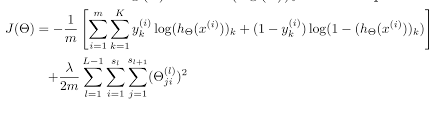
<p>The implementation of the cost function ignores the regularization for simplicity</p>

In [10]:
def cost_function(thetas, x, y):
    m = x.shape[0]
    h = forward_propogation(thetas, x)
    cost = np.sum(np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))
    cost /= (-m)
    return cost

<h3>Backpropagation</h3>
<p>In backpropagation, we are correcting the weights by iterating through each training example and computing the partial derivatives at each iteration</p>
<p>This algorithm eventually returns the partial derivatives of the weights</p>

In [11]:
def backpropogation(thetas, x, y):
    theta1, theta2 = rolling(thetas)
    delta1, delta2 = np.zeros(theta1.shape), np.zeros(theta2.shape)
    m = x.shape[0]
    for i in range(m):
        a1 = x[i]
        z2,a2,z3,a3 = forward_propogation_x_i(thetas, a1)
        d3 = a3 - y[i, :]
        d2 = np.dot(theta2, d3) * sigmoid_derivative(a2)
        
        d2 = d2[:, np.newaxis]
        a1 = a1[:, np.newaxis].T
        delta1 += np.dot(d2, a1)
        
        a2 = a2[:, np.newaxis]
        d3 = d3[:, np.newaxis].T
        delta2 += np.dot(a2, d3)
    delta1 /= m
    delta2 /= m
    
    return unrolling(delta1, delta2)

<h3>Training the classifier</h3>
<p>After implementing the cost function and the backpropagation algorithm for computing the partial derivatives, we now use the advanced optimization algorithm to minimize the cost associated with the weights and update weights accordingly.</p>

In [12]:
def fit(x, y):
    theta1 = np.random.randn(input_layer_size + 1, hidden_layer_size)
    theta2 = np.random.randn(hidden_layer_size + 1, output_layer_size)
    thetas = unrolling(theta1, theta2)
    result = fmin_tnc(func=cost_function, x0=thetas, fprime=backpropogation, args=(x, y))
    return result[0]

optimized_weights = fit(features, labels)
print(optimized_weights.shape)

(35,)


<h3>Accuracy</h3>
<p>After obtaining the optimized weights, we predict the training examples and compare them with the labels, and get the percentage of coorectly classified examples.</p>

In [13]:
def predict(thetas, x, y):
    h = forward_propogation(thetas, x)
    pred = np.argmax(h, axis = 1)
    print("Accuracy : ", np.mean(pred == y.flatten()) * 100)

predict(optimized_weights, features, dataset['Species'].values)

Accuracy :  79.33333333333333
